In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from fastai import *
from fastai.vision import *
from fastai.utils.show_install import show_install
from torchvision import transforms

In [6]:
show_install()



```text
=== Software === 
python       : 3.6.7
fastai       : 1.0.47
fastprogress : 0.1.19
torch        : 1.0.0.dev20190113
torch cuda   : None / is **Not available** 

=== Hardware === 
No GPUs available 

=== Environment === 
platform     : Darwin-18.2.0-x86_64-i386-64bit
conda env    : base
python       : /Users/georgezhang/anaconda3/bin/python
sys.path     : 
/Users/georgezhang/anaconda3/lib/python36.zip
/Users/georgezhang/anaconda3/lib/python3.6
/Users/georgezhang/anaconda3/lib/python3.6/lib-dynload
/Users/georgezhang/anaconda3/lib/python3.6/site-packages
/Users/georgezhang/anaconda3/lib/python3.6/site-packages/aeosa
/Users/georgezhang/anaconda3/lib/python3.6/site-packages/IPython/extensions
/Users/georgezhang/.ipython
no supported gpus found on this system
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.



## Pad Individual Image

Here we are going to pad individual image using PyTorch to 512 x 512.

In [7]:
path = Path('.')

In [8]:
path.ls()

[PosixPath('MURA-Inference.ipynb'),
 PosixPath('preprocess.ipynb'),
 PosixPath('sample'),
 PosixPath('sample.tar.gz'),
 PosixPath('valid_interp.csv'),
 PosixPath('valid_labeled_studies.csv'),
 PosixPath('.ipynb_checkpoints')]

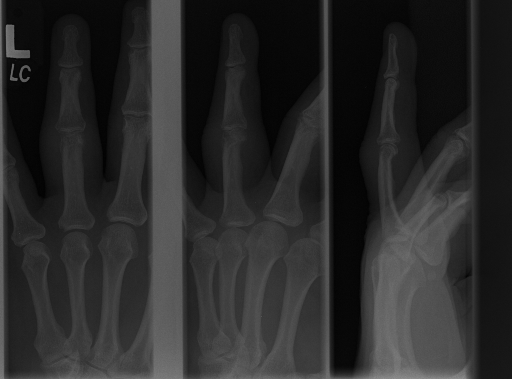

In [9]:
PIL.Image.open(path/'sample/patient00011/study1_negative/image1.png')

In [10]:
sample = PIL.Image.open(path/'sample/patient00114/study1_negative/image1.png')

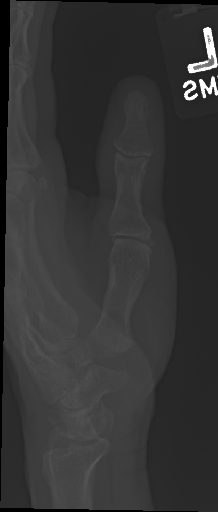

In [11]:
sample

In [12]:
tfm = transforms.Pad((100, 0), fill=0, )

In [13]:
sample.size

(218, 512)

In [14]:
def pad_to_512(img):
    width, height = img.size
    width_pad, height_pad = 512 - width, 512 - height
    pad_left= width_pad // 2
    pad_top = height_pad // 2
    pad_right = width_pad - pad_left
    pad_bot = height_pad - pad_top
    pad_tfm = transforms.Pad((pad_left, pad_top, pad_right, pad_bot),
                             fill=0, padding_mode='constant')
    return pad_tfm(img)

In [20]:
for img_path in get_image_files(path, recurse=True):
    img = PIL.Image.open(img_path)
    assert pad_to_512(img).size == (512, 512)

In [47]:
paths = get_image_files(path, recurse=True)

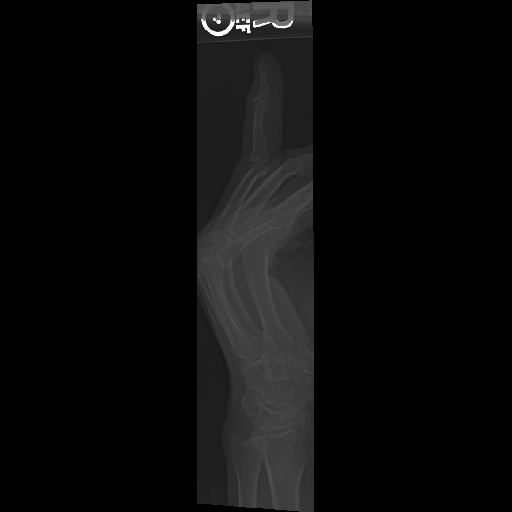

In [48]:
pad_to_512(PIL.Image.open(np.random.choice(paths)))

In [54]:
[open_image(img_path) for img_path in np.random.choice(paths, size=5)]

[Image (3, 512, 185),
 Image (3, 512, 352),
 Image (3, 512, 146),
 Image (3, 379, 512),
 Image (3, 512, 365)]

In [60]:
imglist = ImageList(get_image_files(path, recurse=True))

In [61]:
imglist

ImageList (26 items)
Image (3, 512, 174),Image (3, 512, 185),Image (3, 512, 173),Image (3, 379, 512),Image (3, 512, 218)
Path: .

In [80]:
data = imglist.split_none().label_const().transform(size=128, resize_method=ResizeMethod.SQUISH).databunch(bs=4)

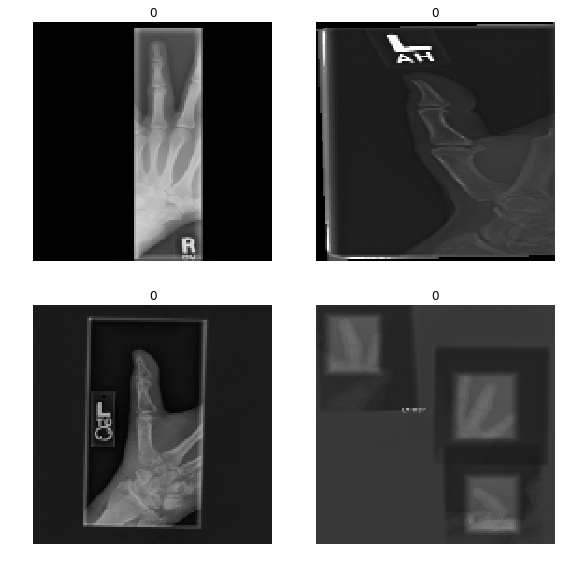

In [84]:
data.show_batch()